In [3]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
from tensorflow.keras import preprocessing

from tensorflow.keras.callbacks import ModelCheckpoint


In [4]:
train_datagen = preprocessing.image.ImageDataGenerator(validation_split=0.20)
train_generator = train_datagen.flow_from_directory(
    '/home/lucas/Downloads/fruits-20/Training',
    batch_size=500,
    color_mode = 'rgb',
    subset='training',
    target_size=(50, 50))


Found 8298 images belonging to 20 classes.


In [5]:
class_indices = train_generator.class_indices 
class_indices

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Tomato 1': 13,
 'Tomato 2': 14,
 'Tomato 3': 15,
 'Tomato 4': 16,
 'Tomato Cherry Red': 17,
 'Tomato Maroon': 18,
 'Tomato Yellow': 19}

In [7]:
valid_generator = train_datagen.flow_from_directory(
    '/home/lucas/Downloads/fruits-20/Training',
    batch_size=500,
    color_mode = 'rgb',
    subset='validation',
    target_size=(50, 50))

Found 2063 images belonging to 20 classes.


In [8]:
#!pip install sciPy

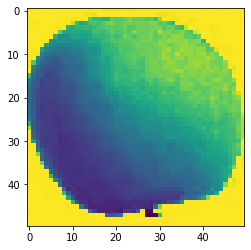

In [9]:
#Visualizando 
x,y = train_generator.next()
for i in range(0,1):
    image = x[i]   
    plt.imshow(image[:,:,0])
    plt.show()

In [10]:
x.shape

(500, 50, 50, 3)

In [11]:
y.shape

(500, 20)

In [12]:
num_classes = y.shape[1]
num_classes

20

In [13]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

In [14]:
# Cria o modelo
model = Sequential()
#Convolução 2D com função de ativação Rectified Linear Units 32 kernels/Pesos (filtros) 
model.add(Conv2D(32, (7, 7), input_shape=(50,50,3), activation='relu')) 
#Camada de Pooling 	    
model.add(MaxPooling2D(pool_size=(2, 2)))
	
#Convolução 2D com função de ativação Rectified Linear Units 64 kernels/Pesos (filtros) 
model.add(Conv2D(64, (5, 5), activation='relu'))
#Camada de Pooling 	
model.add(MaxPooling2D(pool_size=(2, 2)))

#Convolução 2D com função de ativação Rectified Linear Units 64 kernels/Pesos (filtros) 
model.add(Conv2D(128, (3, 3), activation='relu'))
#Camada de Pooling 	
model.add(MaxPooling2D(pool_size=(2, 2)))

#Remove 30% dos dados de entrada aleatoriamente 
model.add(Dropout(0.3))
#Converte o conjunto de imagens e um vetor unidimensional para a entrada da rede neural totalmente conectada
model.add(Flatten())

print( model.output_shape)
model.add(Dense(512, activation='relu'))
print( model.output_shape)
model.add(Dense(128, activation='relu'))
print( model.output_shape)
model.add(Dense(64, activation='relu'))
print( model.output_shape)
model.add(Dense(num_classes, activation='softmax'))
print( model.output_shape)


(None, 1152)
(None, 512)
(None, 128)
(None, 64)
(None, 20)


In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 44, 44, 32)        4736      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 128)         0

In [17]:
mcp_save = ModelCheckpoint('model_best_fruits360.h5', monitor='val_accuracy', mode= 'auto', save_weights_only=True, save_best_only=True, verbose =1)

model.fit(train_generator, 
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=30, callbacks=[mcp_save])

Epoch 1/30
16/16 [==============================] - 15s 889ms/step - loss: 5.5918 - accuracy: 0.1318 - val_loss: 2.3939 - val_accuracy: 0.2005

Epoch 00001: val_accuracy improved from -inf to 0.20050, saving model to model_best_fruits360.h5
Epoch 2/30
16/16 [==============================] - 13s 827ms/step - loss: 1.6912 - accuracy: 0.4395 - val_loss: 1.0895 - val_accuracy: 0.6685

Epoch 00002: val_accuracy improved from 0.20050 to 0.66850, saving model to model_best_fruits360.h5
Epoch 3/30
16/16 [==============================] - 13s 833ms/step - loss: 0.6015 - accuracy: 0.7916 - val_loss: 0.5895 - val_accuracy: 0.8585

Epoch 00003: val_accuracy improved from 0.66850 to 0.85850, saving model to model_best_fruits360.h5
Epoch 4/30
16/16 [==============================] - 14s 882ms/step - loss: 0.1880 - accuracy: 0.9373 - val_loss: 0.6671 - val_accuracy: 0.8685

Epoch 00004: val_accuracy improved from 0.85850 to 0.86850, saving model to model_best_fruits360.h5
Epoch 5/30
16/16 [=========

In [18]:
test_datagen = preprocessing.image.ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    '/home/lucas/Downloads/fruits-20/Test',
    batch_size=1,
    color_mode = 'rgb',    
    target_size=(50, 50))

FileNotFoundError: [Errno 2] No such file or directory: 'Datasets/fruits-20/Test'

In [27]:
scores = model.generator(test_generator)   
print(scores)

[0.1861829161643982, 0.9514310359954834]


In [28]:
predictions = model.predict(test_generator)
print(predictions)

[[6.4935813e-12 2.2160298e-06 2.3492525e-14 ... 5.8744313e-13
  2.2347451e-09 2.6689265e-13]
 [2.2605972e-03 2.3137174e-09 1.1210396e-11 ... 3.3724408e-17
  6.9491897e-09 2.4788523e-07]
 [2.7992017e-24 1.2154361e-22 2.0476210e-15 ... 2.0829258e-35
  1.9482001e-27 1.2892619e-12]
 ...
 [8.7613389e-12 6.8597357e-11 3.3574787e-13 ... 5.2053375e-12
  3.4838302e-12 9.5005248e-14]
 [9.3929434e-11 1.3828390e-09 7.5838349e-11 ... 4.1652601e-09
  3.2517922e-10 3.4044120e-10]
 [3.1399122e-06 6.2503687e-09 1.2298299e-12 ... 1.5584097e-19
  7.8275775e-11 3.6571706e-07]]


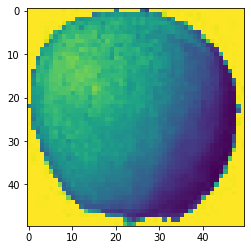

In [29]:
fileimg = r'/home/lucas/Downloads/fruits-20/Apple Red 3/4_100.jpg'

img = load_img(fileimg , color_mode = "rgb", target_size=(50, 50))

#
x = img_to_array(img)

plt.imshow(x[:,:,0])
plt.show()

In [30]:
x.shape

(50, 50, 3)

In [31]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 50, 50, 3)

In [ ]:
y_pred = model.predict(x)
res = np.argmax(y_pred)
print(res)


In [35]:
key=list(class_indices.keys())[list(class_indices.values()).index(res)]
print(key)

Apple Red 3
